WT2,HT2,WT9,HT9,LG9,ST9,WT18,HT18,LG18,ST18,BMI18,Soma
13.6,87.7,32.5,133.4,28.4,74,56.9,158.9,34.6,143,22.5,5.0
11.3,90.0,27.8,134.8,26.9,65,49.9,166.0,33.8,117,18.1,4.0
17.0,89.6,44.4,141.5,31.9,104,55.3,162.2,35.1,143,21.0,5.5
13.2,90.3,40.5,137.1,31.8,79,65.9,167.8,39.3,148,23.4,5.5
13.3,89.4,29.9,136.1,27.7,83,62.3,170.9,36.3,152,21.3,4.5
11.3,85.5,22.8,130.6,23.4,60,47.4,164.9,31.8,126,17.4,3.0


type,MSE
regression,0.02917064
LASSO,0.30310813
Ridge,1.55953574


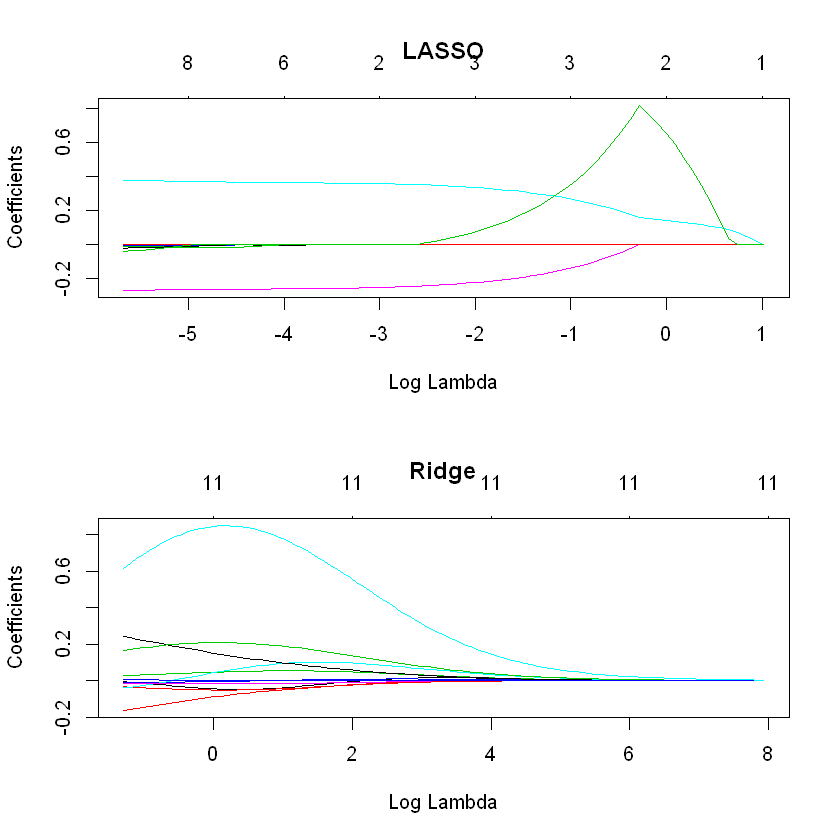

APMAM,APSAB,APSLAKE,OPBPC,OPRC,OPSLAKE,BSAAM
9.13,3.58,3.91,4.10,7.43,6.47,54235
5.28,4.82,5.20,7.55,11.11,10.26,67567
4.20,3.77,3.67,9.52,12.20,11.35,66161
4.60,4.46,3.93,11.14,15.15,11.13,68094
7.15,4.99,4.88,16.34,20.05,22.81,107080
9.70,5.65,4.91,8.88,8.15,7.41,67594


type,MSE
regression,70078139
LASSO,75800545
Ridge,281664560


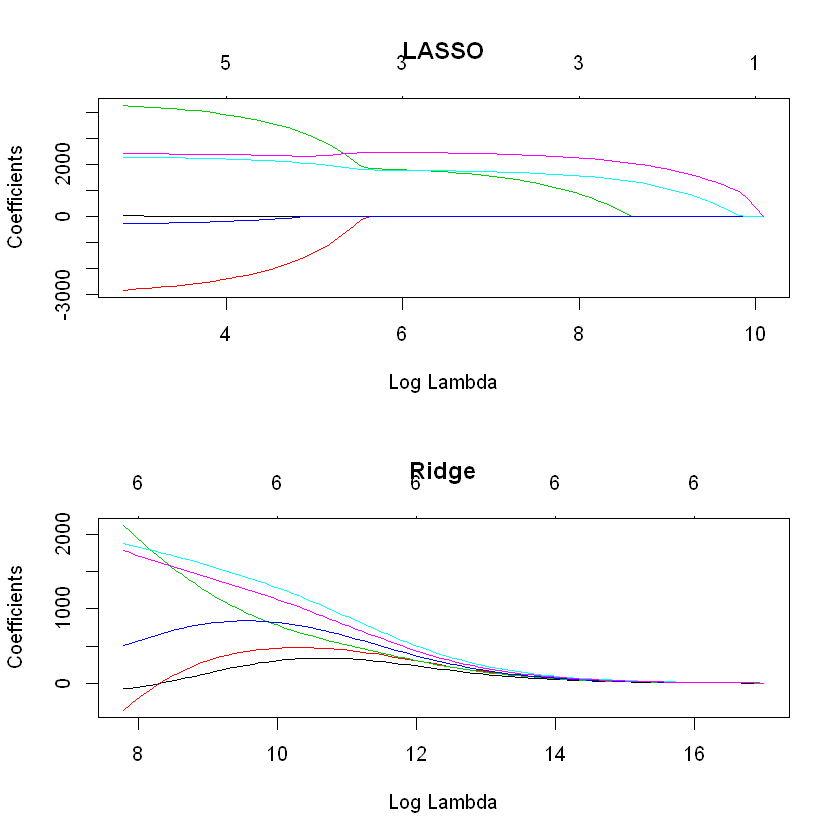

In [4]:
data1=read.table('C:\\Users\\coco40725\\Documents\\GitHub\\2nd-ML100Days\\data\\dat.bgs.txt',header=T)
data2=read.table('C:\\Users\\coco40725\\Documents\\GitHub\\2nd-ML100Days\\data\\dat.water.txt',header=T)
data2=data2[,-1]


library(glmnet)

## data 1
head(data1)
data1.test.loc=sample(x=1:nrow(data1),size=nrow(data1)*(1/3)) # 1/3 data
data1.test=as.matrix(data1[data1.test.loc,])
data1.train=as.matrix(data1[-data1.test.loc,])

fit.reg.1=lm(BMI18~.,data=as.data.frame(data1.train))

fit.lasso.1 = glmnet(data1.train[,-11], 
                   data1.train[,11], 
                   family="gaussian", 
                   alpha=1)

fit.ridge.1 = glmnet(data1.train[,-11], 
                   data1.train[,11], 
                   family="gaussian", 
                   alpha=0)

par(mfrow=c(2,1))
plot(fit.lasso.1, xvar="lambda",main ='LASSO')
plot(fit.ridge.1, xvar="lambda", main="Ridge")

pred.reg.1=predict(fit.reg.1,as.data.frame(data1.test[,-11]))
pred.lasso.1=predict(fit.lasso.1,as.matrix(data1.test[,-11]))
pred.ridge.1=predict(fit.ridge.1,as.matrix(data1.test[,-11]))

result1=data.frame(type=c('regression','LASSO','Ridge'),
                   MSE=c(mean((pred.reg.1-data1.test[,11])^2),
                         mean((pred.lasso.1-data1.test[,11])^2),
                         mean((pred.ridge.1-data1.test[,11])^2)))

result1

## data2
data2.test.loc=sample(x=1:nrow(data2),size=nrow(data2)*(1/3)) # 1/3 data
data2.test=as.matrix(data2[data2.test.loc,])
data2.train=as.matrix(data2[-data2.test.loc,])


fit.reg.2=lm(BSAAM~.,data=as.data.frame(data2.train))

fit.lasso.2 = glmnet(data2.train[,-7], 
                     data2.train[,7], 
                     family="gaussian", 
                     alpha=1)

fit.ridge.2 = glmnet(data2.train[,-7], 
                     data2.train[,7], 
                     family="gaussian", 
                     alpha=0)

par(mfrow=c(2,1))
plot(fit.lasso.2, xvar="lambda",main ='LASSO')
plot(fit.ridge.2, xvar="lambda", main="Ridge")

pred.reg.2=predict(fit.reg.2,as.data.frame(data2.test[,-7]))
pred.lasso.2=predict(fit.lasso.2,as.matrix(data2.test[,-7]))
pred.ridge.2=predict(fit.ridge.2,as.matrix(data2.test[,-7]))

result2=data.frame(type=c('regression','LASSO','Ridge'),
                   MSE=c(mean((pred.reg.2-data2.test[,7])^2),
                         mean((pred.lasso.2-data2.test[,7])^2),
                         mean((pred.ridge.2-data2.test[,7])^2)))
head(data2)

result2